In [23]:
!pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

cdc = fetch_ucirepo(id=891)
X = cdc.data.features.copy()
y = cdc.data.targets.copy()

print(cdc.metadata)
print(X.shape, y.shape)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [25]:
print(X.isna().sum().sum(), "missing values in features")
print(y.isna().sum(), "missing values in target")
print(X.duplicated().sum(), "duplicate rows")


0 missing values in features
Diabetes_binary    0
dtype: int64 missing values in target
25772 duplicate rows


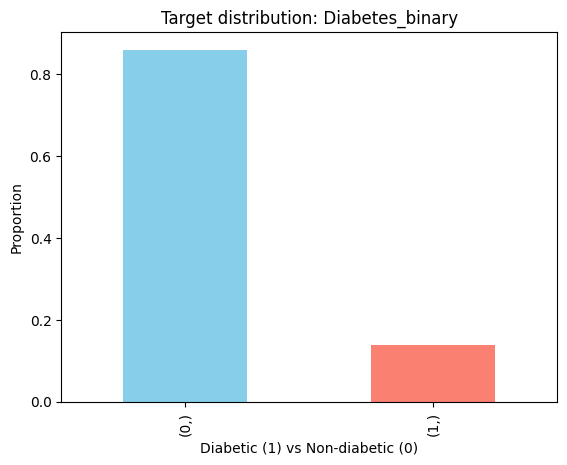

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as plt
y.value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title('Target distribution: Diabetes_binary')
plt.xlabel('Diabetic (1) vs Non-diabetic (0)')
plt.ylabel('Proportion')
plt.show()

print(y.value_counts())


In [27]:
X.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


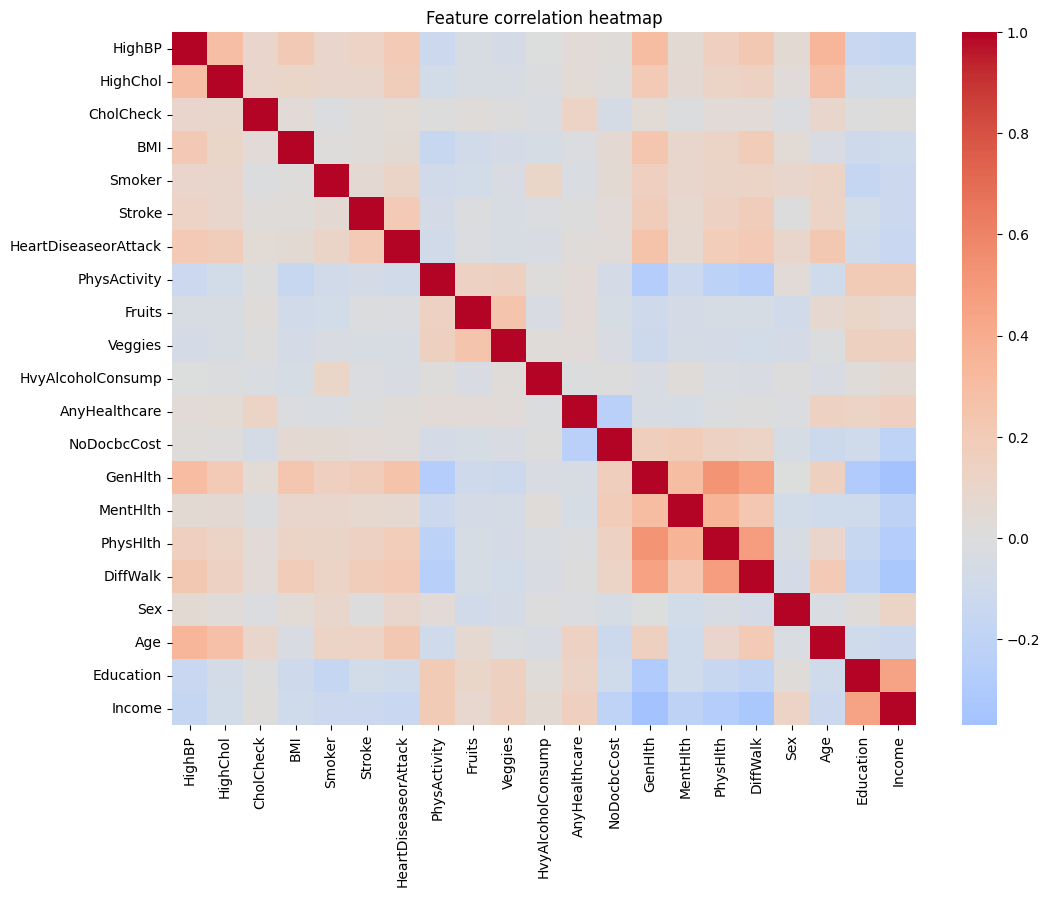

In [28]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation heatmap")
plt.show()

In [29]:
Xy = X.copy()
Xy['Diabetes_binary'] = y
mean_by_class = Xy.groupby('Diabetes_binary').mean().T
mean_by_class['diff'] = mean_by_class[1] - mean_by_class[0]
mean_by_class.sort_values('diff', ascending=False).head(10)

Diabetes_binary,0,1,diff
PhysHlth,3.641082,7.954479,4.313397
BMI,27.805770,31.944011,4.138241
Age,7.814065,9.379053,1.564988
MentHlth,2.978034,4.461806,1.483772
GenHlth,2.385185,3.290981,0.905796
HighBP,0.376602,0.752674,0.376072
HighChol,0.384297,0.670118,0.285822
DiffWalk,0.135361,0.371216,0.235855
HeartDiseaseorAttack,0.073351,0.222882,0.149531
Smoker,0.431019,0.518220,0.087201


In [30]:
import numpy as np
import pandas as pd

if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0] if y.shape[1] == 1 else y['Diabetes_binary']

#Dropping duplicates
Xy = pd.concat([X, y], axis=1).drop_duplicates()
X, y = Xy.iloc[:, :-1], Xy.iloc[:, -1]
if X.isna().sum().sum() > 0:
    X = X.fillna(X.median(numeric_only=True))
if y.isna().sum() > 0:
    keep = ~y.isna()
    X, y = X[keep], y[keep]

print(f"Data ready -> X: {X.shape}, y: {y.shape}")

Data ready -> X: (229474, 21), y: (229474,)


Class weights: {np.int64(0): np.float64(0.5900433262194338), np.int64(1): np.float64(3.276441192218454)}

Hold-out test metrics:
  Accuracy : 0.7788
  Precision: 0.2876
  Recall   : 0.2937
  F1-score : 0.2906
  ROC AUC  : 0.5810

Classification report:
               precision    recall  f1-score   support

           0     0.8706    0.8673    0.8689     38813
           1     0.2876    0.2937    0.2906      7082

    accuracy                         0.7788     45895
   macro avg     0.5791    0.5805    0.5798     45895
weighted avg     0.7807    0.7788    0.7797     45895



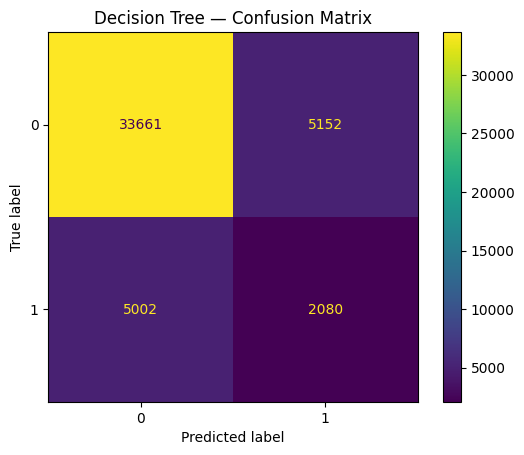


Top 15 features:
 BMI             0.137389
HighBP          0.127406
Age             0.105143
Income          0.094311
GenHlth         0.088365
PhysHlth        0.076090
Education       0.066081
MentHlth        0.057884
Smoker          0.034266
Fruits          0.033046
PhysActivity    0.027684
Sex             0.025097
Veggies         0.023879
HighChol        0.018967
DiffWalk        0.018670
dtype: float64


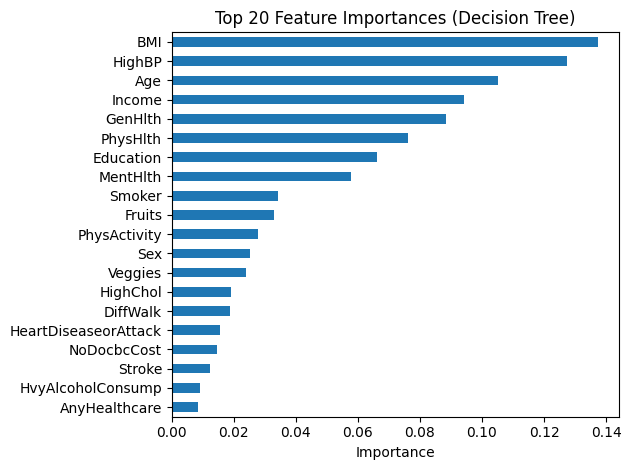

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, shuffle=True
)

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {c: w for c, w in zip(classes, weights)}
print("Class weights:", class_weight)

dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight=class_weight,
    criterion="gini",
    max_depth=None
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1] if hasattr(dt, "predict_proba") else None

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
roc = roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")

print(f"\nHold-out test metrics:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")
print(f"  ROC AUC  : {roc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(values_format="d")
plt.title("Decision Tree — Confusion Matrix")
plt.show()

importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 features:\n", importances.head(15))
plt.figure()
importances.head(20)[::-1].plot(kind="barh")
plt.title("Top 20 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import KFold, cross_validate

RANDOM_STATE = 42
kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

cv_results = cross_validate(dt, X, y, cv=kf, scoring=scoring, n_jobs=-1)

print("\nK-Fold Cross Validation Results (k=10):\n")

print("Accuracy scores :", np.round(cv_results['test_accuracy'], 4))
print("Mean Accuracy   :", np.round(cv_results['test_accuracy'].mean(), 4))

print("\nPrecision scores:", np.round(cv_results['test_precision'], 4))
print("Mean Precision  :", np.round(cv_results['test_precision'].mean(), 4))

print("\nRecall scores   :", np.round(cv_results['test_recall'], 4))
print("Mean Recall     :", np.round(cv_results['test_recall'].mean(), 4))

print("\nF1 scores       :", np.round(cv_results['test_f1'], 4))
print("Mean F1 Score   :", np.round(cv_results['test_f1'].mean(), 4))


K-Fold Cross Validation Results (k=10):

Accuracy scores : [0.7799 0.7776 0.7775 0.7789 0.7681 0.7768 0.7792 0.7774 0.7785 0.7815]
Mean Accuracy   : 0.7776

Precision scores: [0.296  0.2775 0.2793 0.2827 0.2692 0.2764 0.3005 0.2622 0.2716 0.2829]
Mean Precision  : 0.2798

Recall scores   : [0.2948 0.2879 0.2877 0.2784 0.2733 0.2918 0.3078 0.2781 0.2863 0.3016]
Mean Recall     : 0.2888

F1 scores       : [0.2954 0.2826 0.2835 0.2805 0.2712 0.2839 0.3041 0.2699 0.2787 0.292 ]
Mean F1 Score   : 0.2842
